<a href="https://colab.research.google.com/github/gustavosdo/BootCampDataScientist/blob/master/Material/Modulo1/Trabalho%20Pr%C3%A1tico/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from math import sqrt

Creating dataset

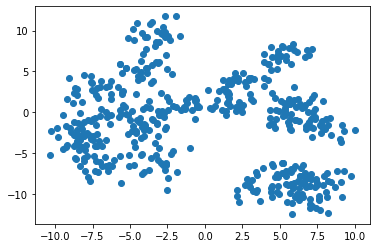

In [2]:
X, y = make_blobs(n_samples = 500, centers = 20, random_state = 999)
plt.scatter(X[:,0], X[:,1])

Finding 1-cluster solution with KMeans

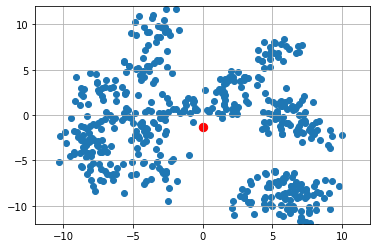

[0.02618523] [-1.30384304]
4717.404091931214


In [10]:

kmeans = KMeans(n_clusters = 1, init = 'k-means++', max_iter = 300, n_init = 10)
pred_y = kmeans.fit_predict(X)
print(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])

What is the WCSS for 1 and 5 clusters?

In [11]:
for i in [1,5]:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    print(kmeans.inertia_)

31547.372471390485
4717.404091931214


How many clusters are ideal for this problem?

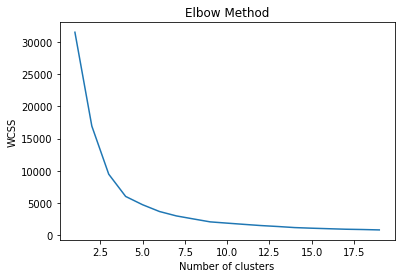

<Figure size 648x648 with 0 Axes>

[31547.372471390485, 16949.214472147927, 9464.847250570496, 6005.101775346179, 4717.433959667094, 3662.6403286096665, 2976.0038976067435, 2508.462360238523, 2049.8679429014373, 1852.6843724858302, 1661.318927354348, 1475.6145884001216, 1328.368512616892, 1160.69828159404, 1065.6610106230514, 985.2828851562747, 905.4875332231312, 860.0309763431944, 798.0321067790262]


In [23]:
wcss = []
for i in range(1, 20):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.figure(figsize = [9, 9])
plt.show()

print(wcss)

In [24]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

print(optimal_number_of_clusters(wcss))

5
